In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# load data
df=pd.read_csv("Telco-Customer-Churn.csv")

# Understanding the Data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The average customer tenure is about 32 months, ranging from 0 to 72 months, indicating a mix of new and long-term customers.

Monthly charges average around USD 64.76 , with half of the customers paying more than USD 70.35, showing that many use higher-tier services.

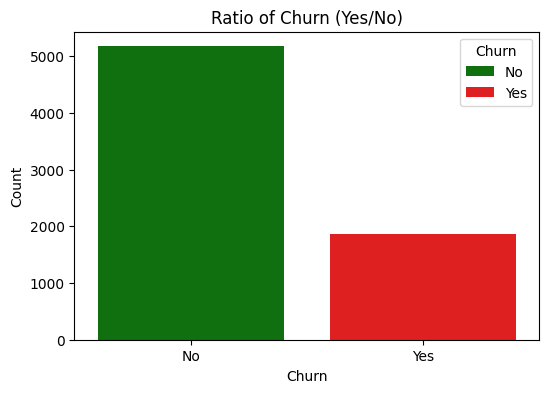

In [8]:
# Count churn values
churn_counts = df["Churn"].value_counts()

# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette=["green", "red"], legend=True)

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Ratio of Churn (Yes/No)")
plt.show()

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

The data is imbalanced with a 73:27 ratio (No:Yes) in the Churn column.

To get meaningful insights, we'll analyze other features separately for churned and non-churned customers.

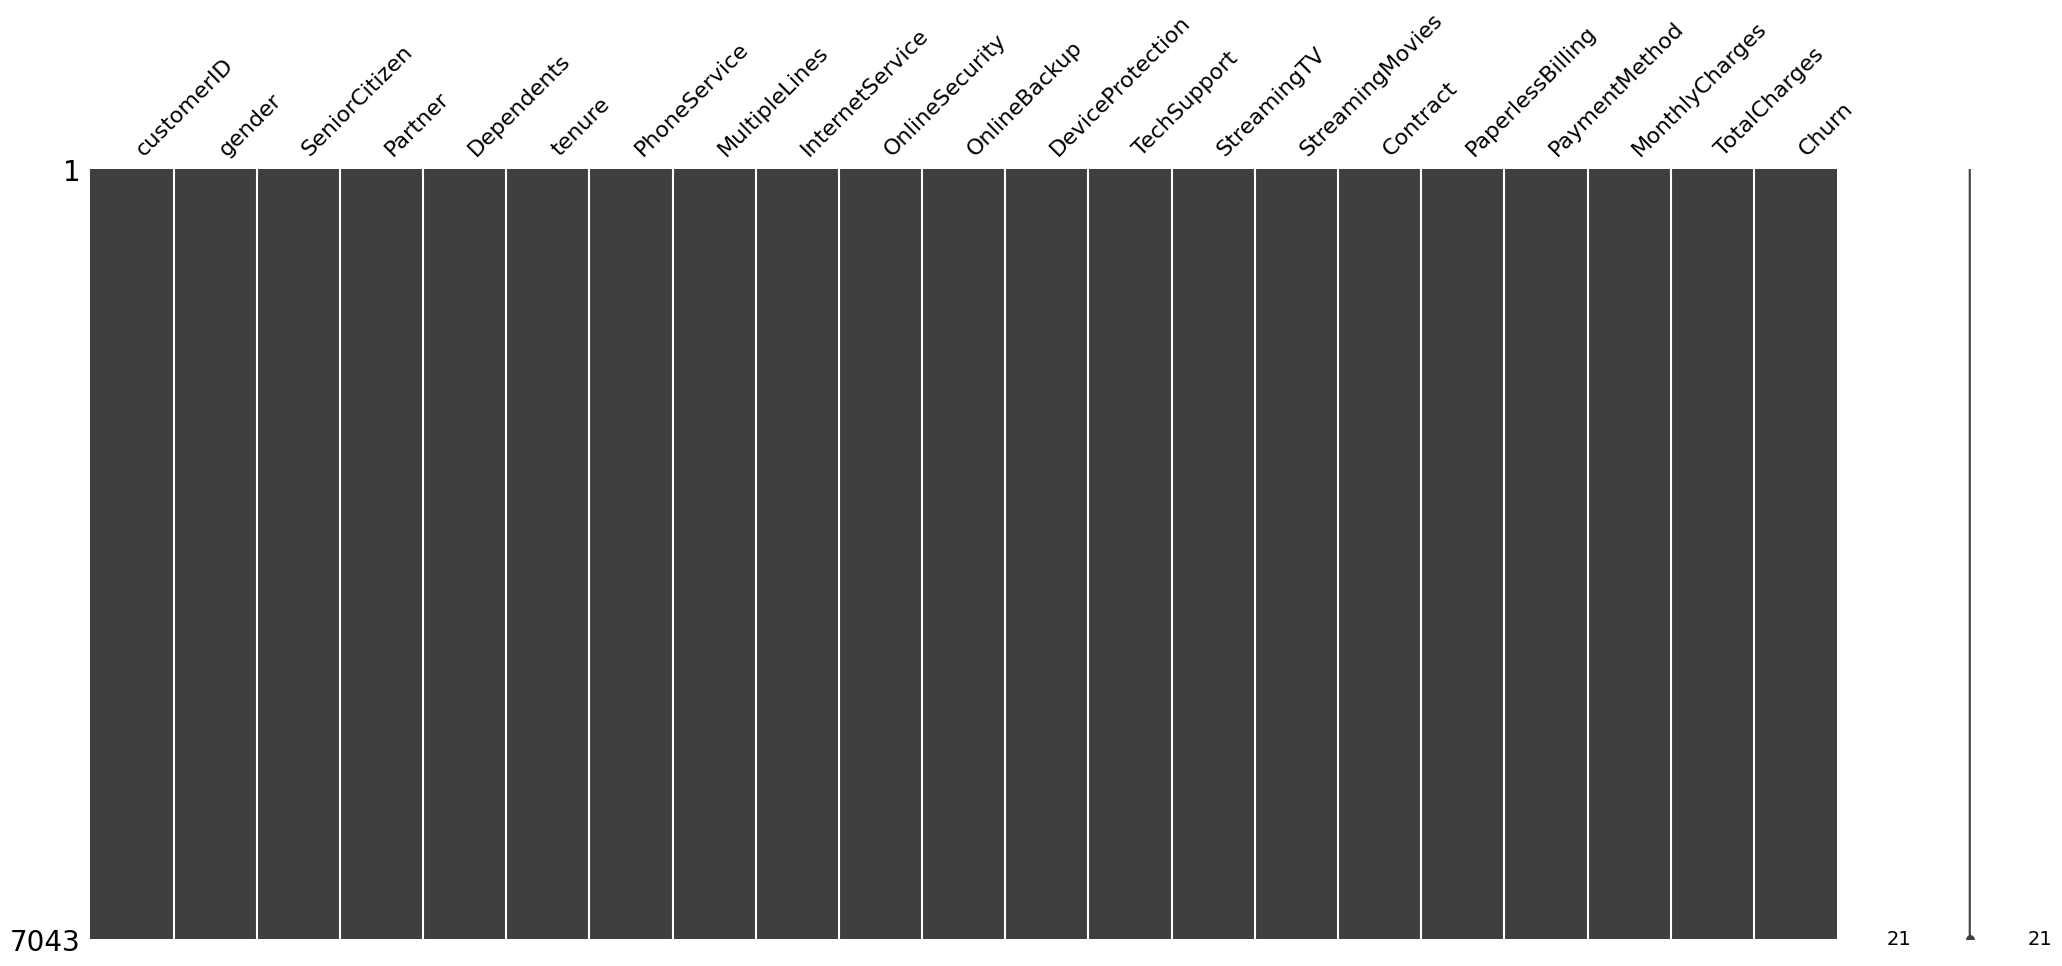

In [11]:
# Visualize missing values as a matrix
msno.matrix(df)
plt.show()

There is no missing data

# Data Cleaning

In [12]:
# make a copy of original data
df_copy = df.copy()


In [13]:
# Convert 'TotalCharges' to numeric format
# Invalid entries will be converted to NaN
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the TotalCharges column.

In [14]:
# Display rows where 'TotalCharges' is missing
df_copy[df_copy['TotalCharges'].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# Drop rows with missing values in 'TotalCharges' column
df_copy = df_copy.dropna(subset=['TotalCharges'])

# Confirm the missing values are gone
print(df_copy['TotalCharges'].isna().sum())


0


In [16]:
max_tenure = df_copy['tenure'].max()
print(f"Maximum tenure: {max_tenure}")


Maximum tenure: 72


In [18]:
# Define bins from 0 to max tenure in steps of 12
bins = list(range(0, df_copy['tenure'].max() + 12, 12))

# Create labels like '1-12', '13-24', ...
labels = [f"{bins[i]+1}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the tenure values into these groups
df_copy['tenure_group'] = pd.cut(
    df_copy['tenure'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

df_copy['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [19]:
# Drop 'customerID' and 'tenure' columns as they are not needed for processing
df_copy.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

df_copy.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

## Univariate Analysis

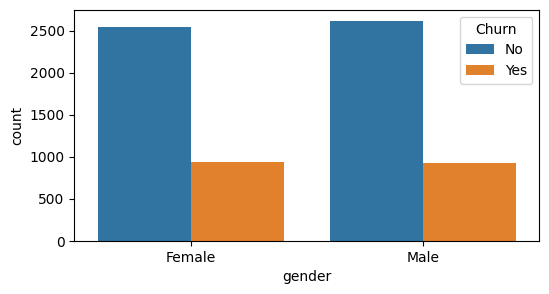

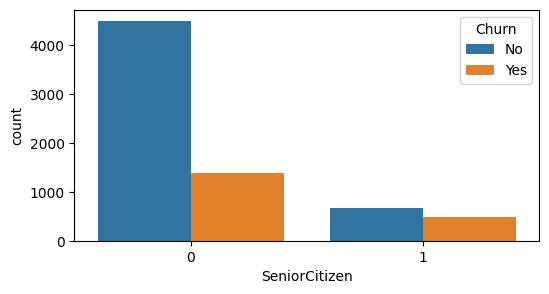

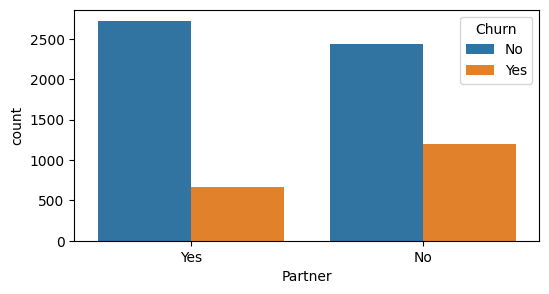

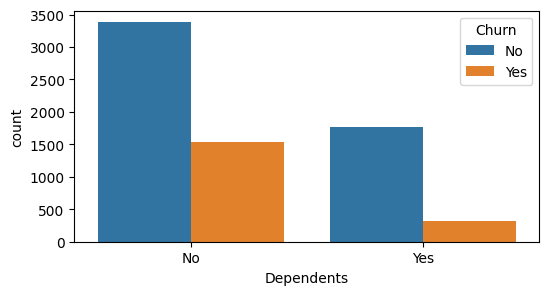

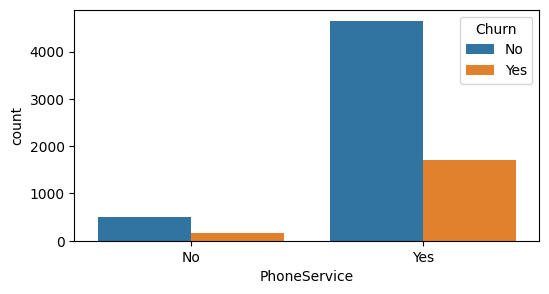

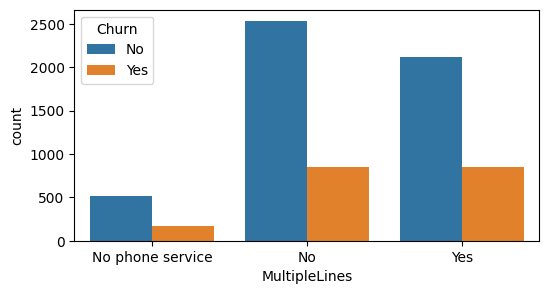

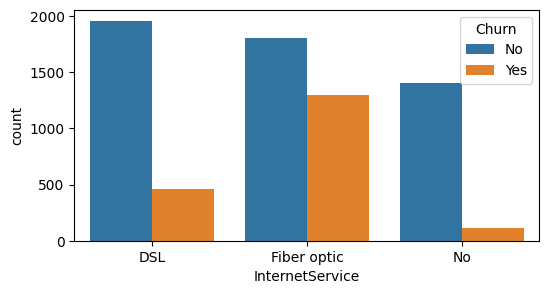

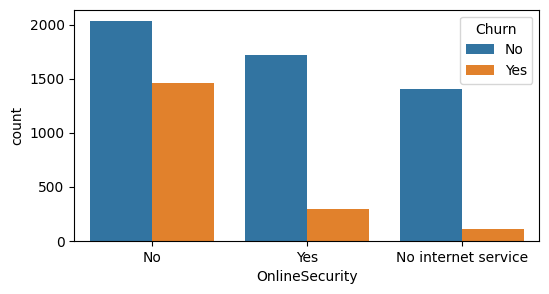

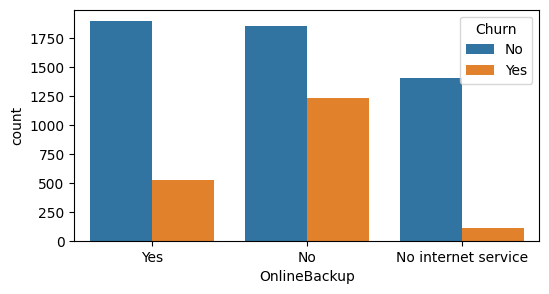

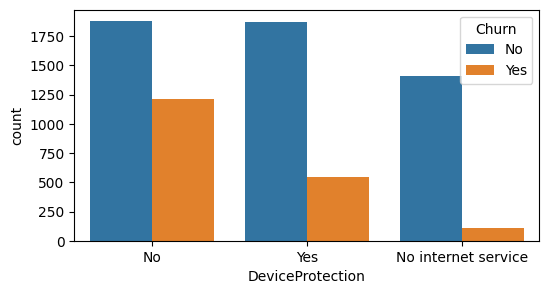

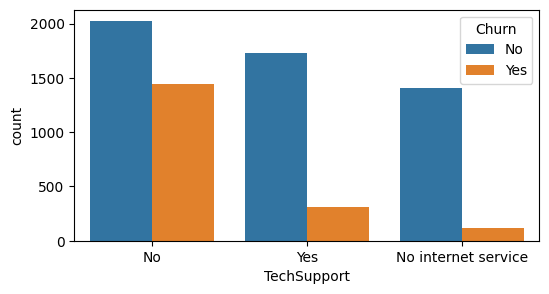

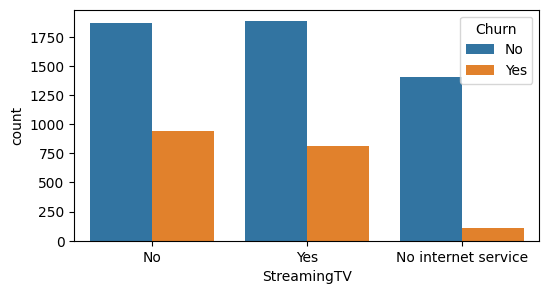

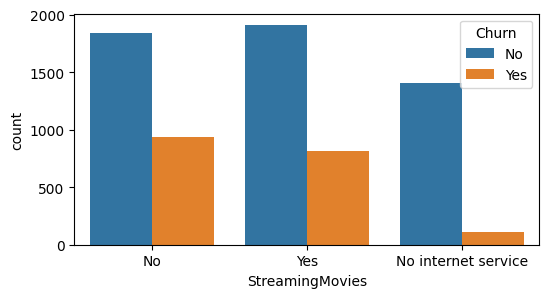

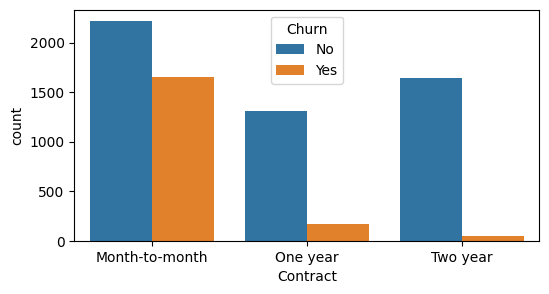

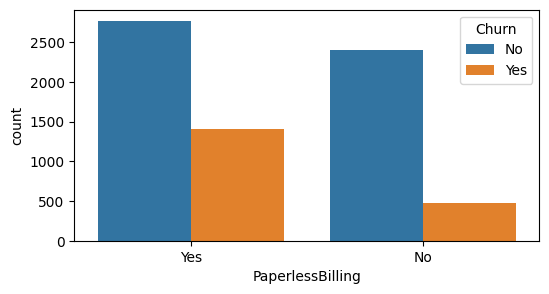

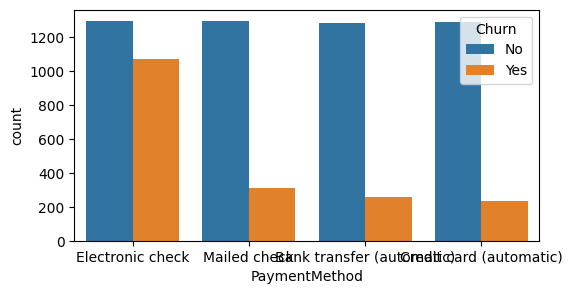

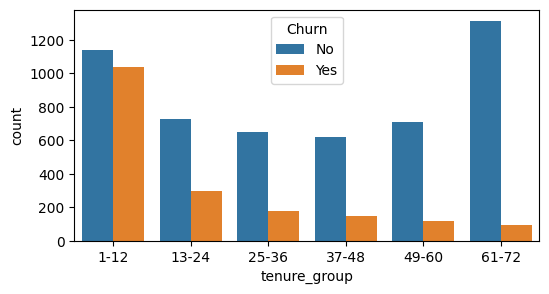

In [20]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i, figsize=(6, 3))
    sns.countplot(data=df_copy, x=predictor, hue='Churn')
    plt.show()


In [21]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)

In [22]:
# Convert all categorical variables to dummy/one-hot encoded variables
df_encoded = pd.get_dummies(df_copy)

# Convert boolean columns (if any) to 0s and 1s
df_encoded = df_encoded.astype(int)

# Check the result
df_encoded.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


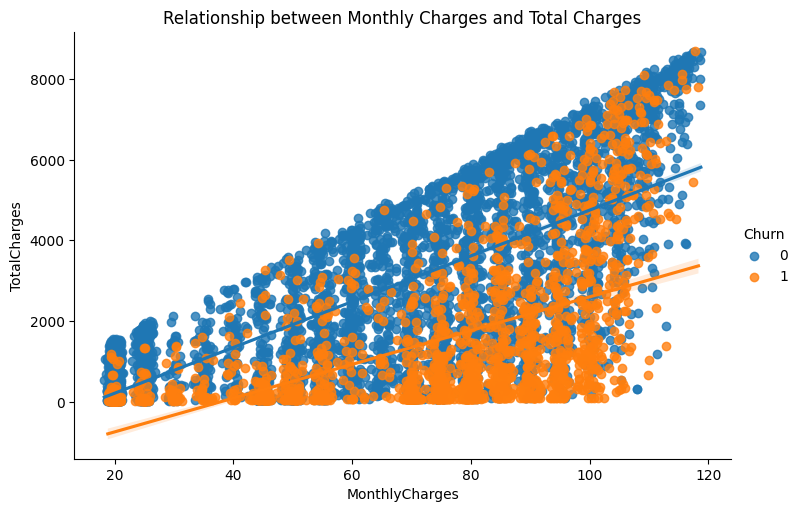

In [23]:
# Scatter plot with a regression line
sns.lmplot(data=df_copy, x='MonthlyCharges', y='TotalCharges', hue='Churn', height=5, aspect=1.5)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()


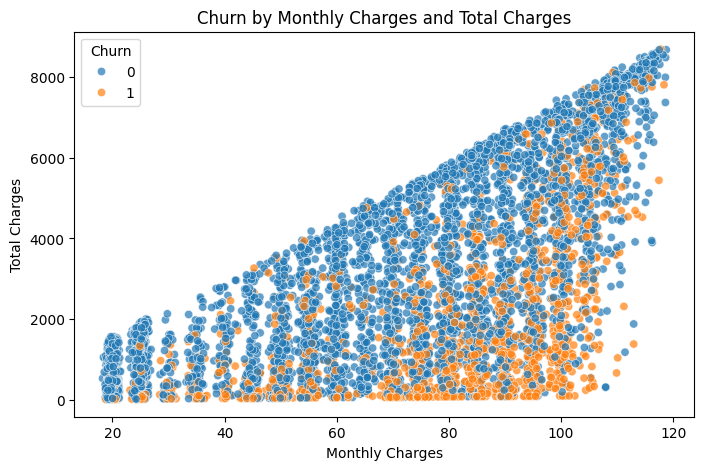

In [51]:
# Create a scatter plot with Churn hue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_copy, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title('Churn by Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


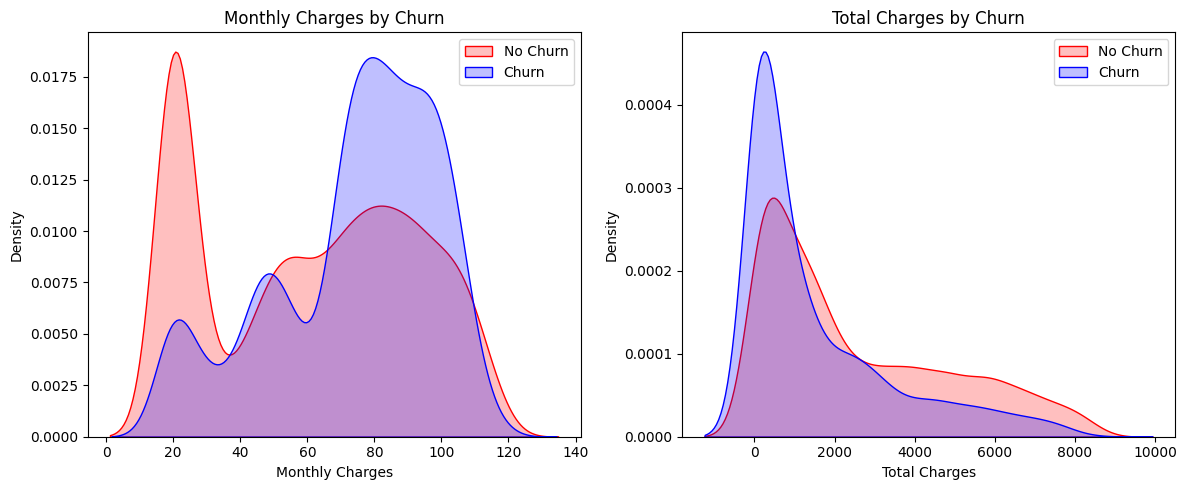

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Monthly Charges KDE
sns.kdeplot(
    df_encoded.MonthlyCharges[df_encoded["Churn"] == 0],
    fill=True, color="Red", ax=ax[0]
)
sns.kdeplot(
    df_encoded.MonthlyCharges[df_encoded["Churn"] == 1],
    fill=True, color="Blue", ax=ax[0]
)
ax[0].legend(["No Churn", "Churn"], loc='upper right')
ax[0].set_title("Monthly Charges by Churn")
ax[0].set_xlabel("Monthly Charges")
ax[0].set_ylabel("Density")

# Total Charges KDE
sns.kdeplot(
    df_encoded.TotalCharges[df_encoded["Churn"] == 0],
    fill=True, color="Red", ax=ax[1]
)
sns.kdeplot(
    df_encoded.TotalCharges[df_encoded["Churn"] == 1],
    fill=True, color="Blue", ax=ax[1]
)
ax[1].legend(["No Churn", "Churn"], loc='upper right')
ax[1].set_title("Total Charges by Churn")
ax[1].set_xlabel("Total Charges")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


Churn is high when monthly charges are high

Churn is high when total charges are low.This links to previous observation that customers with short tenure are more likely to churn.

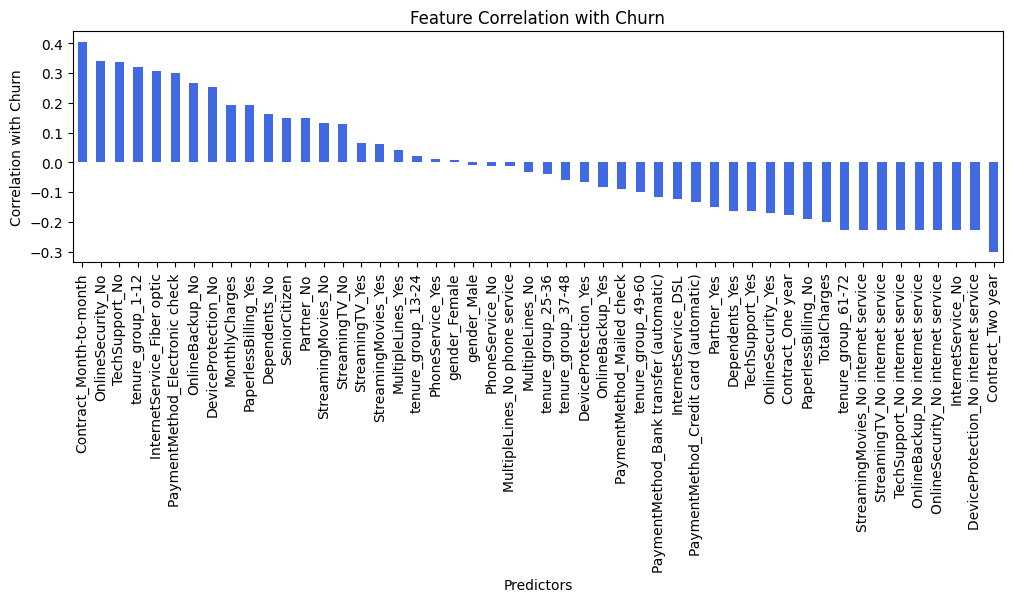

In [25]:
# Compute correlation with Churn
churn_corr = df_encoded.corr()["Churn"].sort_values(ascending=False)


# Plot bar chart
plt.figure(figsize=(12, 3))
churn_corr.drop("Churn").plot(kind="bar", color="royalblue")
plt.xlabel("Predictors")
plt.ylabel("Correlation with Churn")
plt.title("Feature Correlation with Churn")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


High churn is seen in the case of month-to-month contracts, no tech support, no online security, electronic check payment, and fiber optic internet.

Low churn is seen in the case of two-year contracts, high tenure, Subscriptions without internet service

No significant impact on churn is seen in the case of gender and phone service.

## Bivariate Analysis

In [26]:
# Using .loc to split the data based on Churn
churn_0 = df_copy.loc[df_copy["Churn"] == 0]
churn_1 = df_copy.loc[df_copy["Churn"] == 1]

In [27]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(8 ,5)
    plt.grid(False)
    plt.xticks(rotation=45)
    plt.yscale('linear')  # Change log scale to linear
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

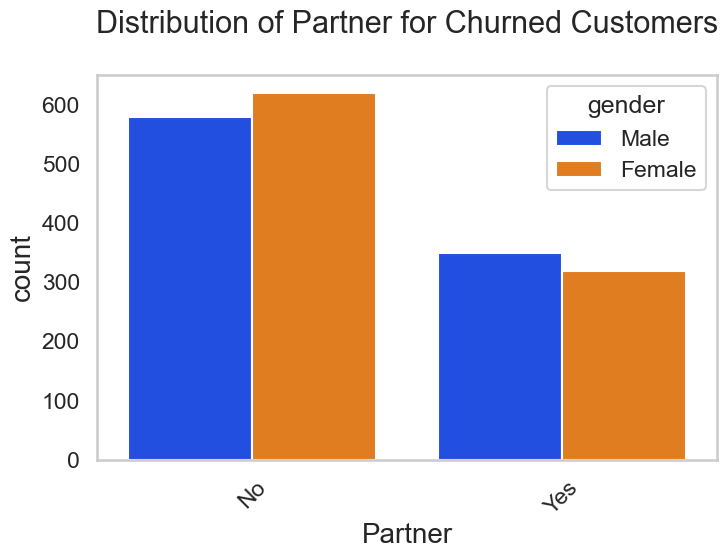

In [28]:
uniplot(churn_1,col='Partner',title='Distribution of Partner for Churned Customers',hue='gender')

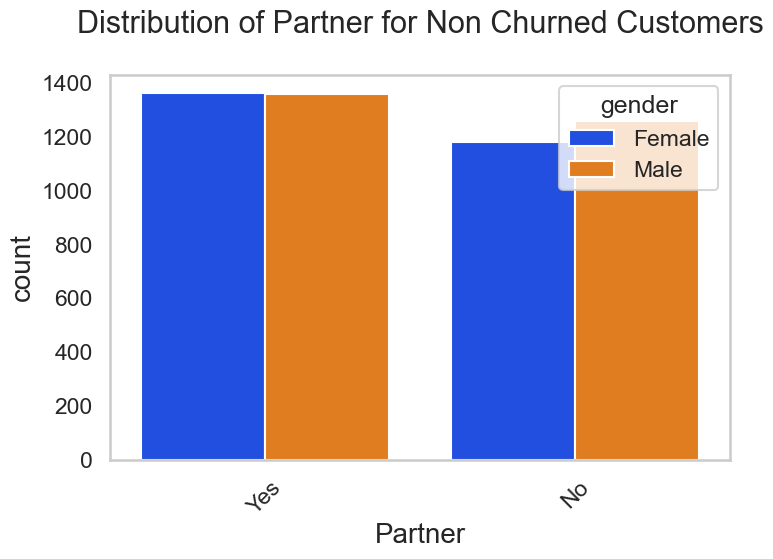

In [29]:
uniplot(churn_0,col='Partner',title='Distribution of Partner for Non Churned Customers',hue='gender')

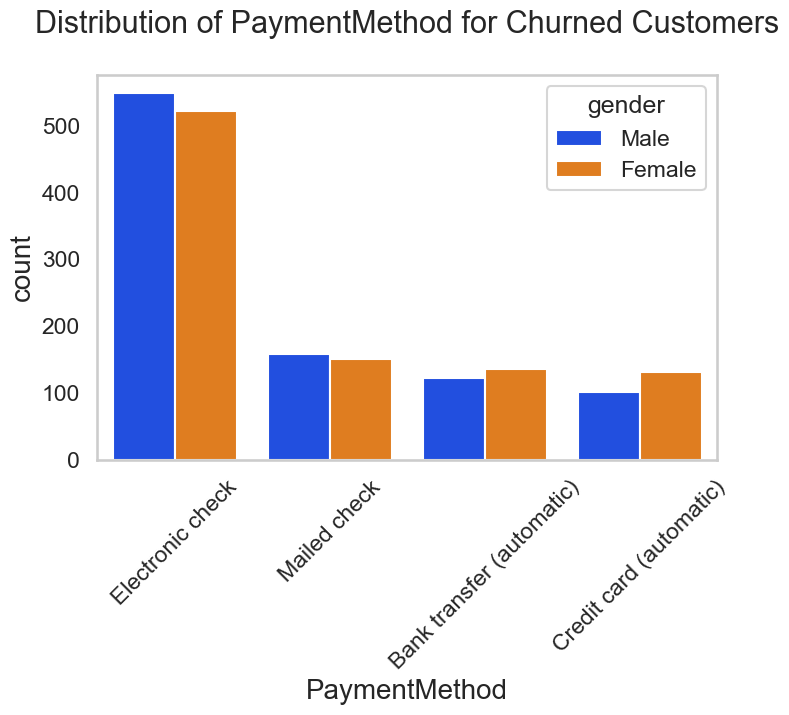

In [93]:
uniplot(churn_1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

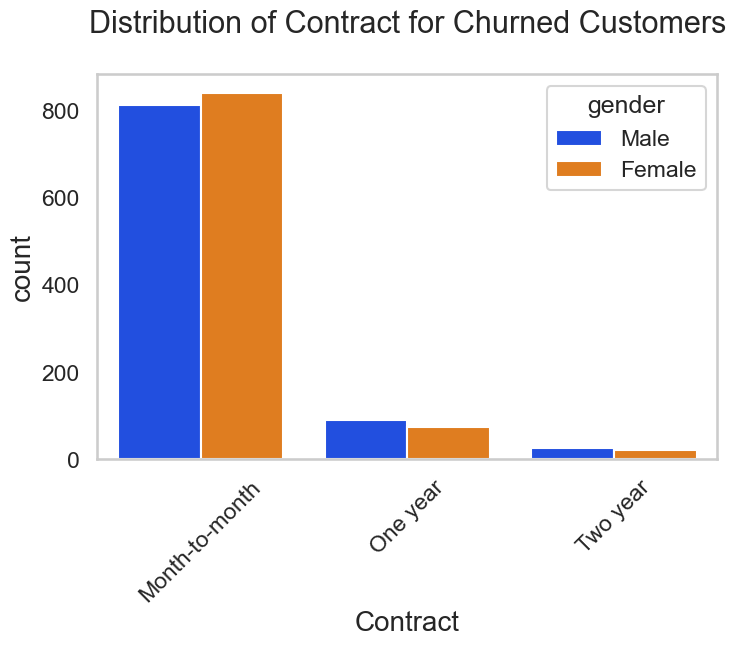

In [30]:
uniplot(churn_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

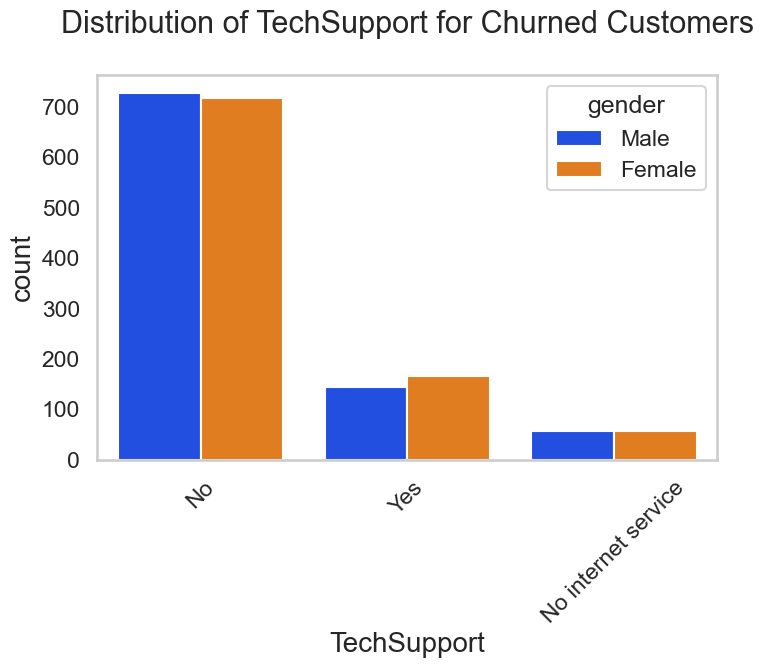

In [31]:
uniplot(churn_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

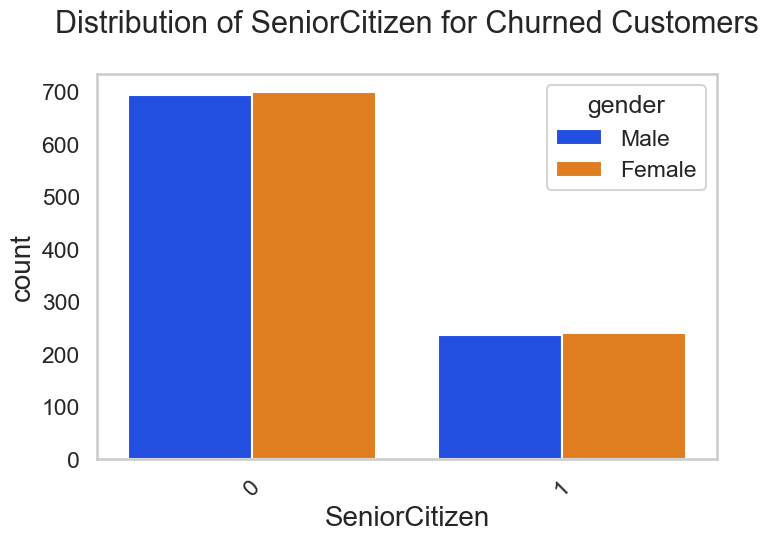

In [32]:
uniplot(churn_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

1. Electronic check medium are the highest churners2. Monthly customers are more likely to churn because of no contract term, as they are free to go customers.
3. 
No Online security, No Tech Supporcategory are high churners
4. Non senior Citizens are high churners

# Model Building

In [45]:
# Importing libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [135]:
df_encoded.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [136]:
x=df_encoded.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103,7362,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29,346,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74,306,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [138]:
y=df_encoded['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

In [137]:
df_encoded = df_encoded.reset_index(drop=True)


In [142]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

### Logistic Regression Classifier

In [110]:
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Logistic Regression Accuracy: 0.7775408670931059
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.61      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407

Confusion Matrix:
[[930 103]
 [210 164]]


C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Apply SMOTEENN on training data 
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train logistic regression on resampled data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy after SMOTEENN:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Logistic Regression Accuracy after SMOTEENN: 0.7668798862828714
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.77      0.77      1407

Confusion Matrix:
[[817 216]
 [112 262]]


C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [111]:
# Initialize the model
dtree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,random_state=42)

# Train on training data
dtree.fit(X_train, y_train)

# Predict on test data
y_pred = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Decision Tree Accuracy: 0.7697228144989339
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.55      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Confusion Matrix:
[[876 157]
 [167 207]]


The model performs better on the "No Churn" class, which is expected due to the class imbalance (73:27).
To deal with class imbalance, we balance the dataset using SMOTEENN, which combines oversampling (SMOTE) and undersampling (ENN) techniques.

In [113]:
# Apply SMOTEENN to balance the training data
smn = SMOTEENN()
X_resampled, y_resampled = smn.fit_resample(X_train, y_train)

# Train Decision Tree classifier on resampled data
dt_smote=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,random_state=42)
dt_smote.fit(X_resampled, y_resampled)

# Predict on test set
ym_pred = dt_smote.predict(X_test)

# Evaluate model
print("Decision Tree Accuracy after SMOTEENN:", accuracy_score(y_test, ym_pred))
print(classification_report(y_test, ym_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Decision Tree Accuracy after SMOTEENN: 0.7185501066098081
              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

Confusion Matrix:
[[876 157]
 [167 207]]


### RandomForest Classifier

In [144]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state = 42,max_depth=6, min_samples_leaf=8)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Random Forest Accuracy: 0.7917555081734187
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[946  87]
 [206 168]]


In [148]:
# Apply SMOTEENN for balancing
smote_enn = SMOTEENN(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42,max_depth=6, min_samples_leaf=8)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7292110874200426
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Confusion Matrix:
[[733 300]
 [ 81 293]]


### Support Vector Classifier (SVC)

In [147]:
# Initialize SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print("SVC Accuracy on original data:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

SVC Accuracy on original data: 0.7341862117981521
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

Confusion Matrix:
[[733 300]
 [ 81 293]]


C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [107]:
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTEENN on training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Train SVC on resampled data
svc_model = SVC(random_state=42)
svc_model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = svc_model.predict(X_test)

# Evaluate
print("SVC Accuracy after SMOTEENN:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


SVC Accuracy after SMOTEENN: 0.6915422885572139
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1033
           1       0.44      0.56      0.49       374

    accuracy                           0.69      1407
   macro avg       0.63      0.65      0.63      1407
weighted avg       0.72      0.69      0.70      1407

Confusion Matrix:
[[765 268]
 [166 208]]


### AdaBoost classifier

In [116]:
# Initialize AdaBoost with a Decision Tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7874911158493249
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[927 106]
 [193 181]]


In [114]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Balance training data with SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Train AdaBoost on balanced data
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_resampled, y_resampled)

# Predict on original test data
y_pred = ada_model.predict(X_test)

# Evaluate results
print("AdaBoost Accuracy after SMOTEENN:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

C:\ProgramData\anaconda3\envs\sql_package\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy after SMOTEENN: 0.7334754797441365
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.75      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.75      1407

Confusion Matrix:
[[753 280]
 [ 95 279]]


## Effect of SMOTEENN on Churn Prediction

The dataset used in this project is imbalanced, with significantly more customers who did not churn than those who did. In such scenarios, standard models tend to favor the majority class (no churn), often leading to poor performance in detecting churners — which is the minority buthe critical class in real world settingss.

To address this, we applied **SMOTEENN**, a combination of **SMOTE (oversampling the minority class)** and **ENN (cleaning noisy majority class samples)**.

### ✅ Observations:

- **Before SMOTEENN:**
  - Higher overall accuracy.
  - Lower recall for churners (class 1).
  - Many churners were misclassified as non-churners.

- **After SMOTEENN:**
  - Slight drop in overall accuracy.
  - Significant **increase in recall** for the churn class.
  - More churners correctly identified.

### 🎯 Conclusion:

> Although the overall accuracy slightly decreased after apping SMOTEENN, the **sability of the model to dete churners improved**, which is more valuable in real-world churn prediction tasks.  
> This tradeff is expted and **desirable** in imbalanced classificion problems where **recall  the minority class** is more important than raw accuracy.



In [149]:
import pickle

# Save your trained model to a file
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))


In [151]:
# Load the saved model from file
loaded_model = pickle.load(open('rf_model.sav', 'rb'))

# Evaluate using the test data
model_score_r1 = loaded_model.score(X_test, y_test)
print("Random Forest Model Accuracy (reloaded):", model_score_r1)


Random Forest Model Accuracy (reloaded): 0.7292110874200426


In [128]:
df_encoded.to_csv("encoded_dataframe.csv", index=False)
